In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import seaborn as sns
import statistics as s
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *

### 1.Загрузите файл HR.csv в pandas dataframe

In [9]:
df = pd.read_csv('HR-2.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### 2.Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
from collections import Counter
for i in df:
    if type(df[i][0]) != str:
        print(i,'mode =', Counter(list(df[i])).most_common(2)[0][0], Counter(list(df[i])).most_common(2)[1][0])

satisfaction_level mode = 0.1 0.11
last_evaluation mode = 0.55 0.5
number_project mode = 4 3
average_montly_hours mode = 135 156
time_spend_company mode = 3 2
Work_accident mode = 0 1
left mode = 0 1
promotion_last_5years mode = 0 1


In [12]:
for i in df:
    if type(df[i][0]) != str:
        print(i,'stdev =', s.stdev(df[i]))

satisfaction_level stdev = 0.24863065106114257
last_evaluation stdev = 0.17116911062327533
number_project stdev = 1.2325923553183522
average_montly_hours stdev = 49.94309937128408
time_spend_company stdev = 1.4601362305354812
Work_accident stdev = 0.35171855238017985
left stdev = 0.42592409938029935
promotion_last_5years stdev = 0.14428146457858235


### 3.Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.

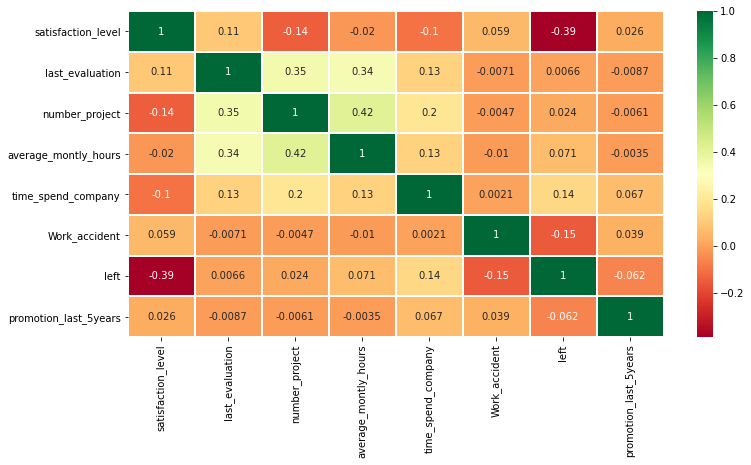

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=1)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

### наиболее коррелируемые переменные - number_project и average_monthly_hours(Прямая корреляция) и satisfaction_lvl и left(обратная корреляция) наименее коррелируемые : Time_spend_company и work_accident + average_monthly_hours и promotion_last_5 years

### 4. Рассчитайте сколько сотрудников работает в каждомдепартаменте.

In [11]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

### 5. Показать распределение сотрудников по зарплатам.

In [16]:
df['salary'].value_counts()


low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [15]:
df2 = df.groupby(['salary']).count()[['left']].reset_index()
df2.columns = ['salary','quantity']
# df2['percent']
df2['(%)'] = round((df2['quantity']/df2['quantity'].sum())*100, 2)
df2

,salary,quantity,(%)
0,high,1237,8.25
1,low,7316,48.78
2,medium,6446,42.98


### 6. Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности

In [16]:
df3 = df.groupby(['department', 'salary']).count()[['left']]
df3.columns = ['quantity']
df3

quantity
department  salary          
IT          high          83
            low          609
            medium       535
RandD       high          51
            low          364
            medium       372
accounting  high          74
            low          358
            medium       335
hr          high          45
            low          335
            medium       359
management  high         225
            low          180
            medium       225
marketing   high          80
            low          402
            medium       376
product_mng high          68
            low          451
            medium       383
sales       high         269
            low         2099
            medium      1772
support     high         141
            low         1146
            medium       942
technical   high         201
            low         1372
            medium      1147

In [19]:
df3 = df[['salary','average_montly_hours']]
df3.groupby(['salary','average_montly_hours']).sum()


Empty DataFrame
Columns: []
Index: [(high, 96), (high, 97), (high, 99), (high, 102), (high, 103), (high, 104), (high, 105), (high, 106), (high, 107), (high, 108), (high, 109), (high, 111), (high, 112), (high, 113), (high, 114), (high, 115), (high, 116), (high, 117), (high, 118), (high, 120), (high, 121), (high, 122), (high, 124), (high, 126), (high, 127), (high, 128), (high, 129), (high, 130), (high, 131), (high, 132), (high, 133), (high, 134), (high, 135), (high, 136), (high, 137), (high, 138), (high, 139), (high, 140), (high, 141), (high, 142), (high, 143), (high, 144), (high, 145), (high, 146), (high, 147), (high, 148), (high, 149), (high, 150), (high, 151), (high, 152), (high, 153), (high, 154), (high, 155), (high, 156), (high, 157), (high, 158), (high, 159), (high, 160), (high, 161), (high, 162), (high, 163), (high, 164), (high, 165), (high, 166), (high, 167), (high, 168), (high, 169), (high, 170), (high, 171), (high, 172), (high, 173), (high, 174), (high, 175), (high, 176), (high, 177), (high, 178), (high, 179), (high, 180), (high, 181), (high, 182), (high, 183), (high, 184), (high, 185), (high, 186), (high, 187), (high, 188), (high, 189), (high, 190), (high, 191), (high, 192), (high, 193), (high, 194), (high, 195), (high, 196), (high, 197), (high, 198), (high, 199), (high, 200), (high, 201), (high, 202), ...]

[619 rows x 0 columns]

### 7. Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низкимокладом

In [20]:
df_high= df3[df3['salary'] == 'high']
df_high['average_montly_hours'].mean()

199.86742118027485

In [21]:
df_medium = df3[df3['salary'] == 'medium']
df_medium['average_montly_hours'].sum()/len(df_medium)

201.33834936394663

In [22]:
df_low = df3[df3['salary'] == 'low']
df_low['average_montly_hours'].sum()/len(df_low)

200.9965828321487

In [23]:
df_high['average_montly_hours'].mean()

199.86742118027485

In [25]:
high = df[df['salary'] == 'high']['average_montly_hours']
medium = df[df['salary'] == 'medium']['average_montly_hours']
low = df[df['salary'] == 'low']['average_montly_hours']
stats.f_oneway(high, medium, low)

F_onewayResult(statistic=0.4583624407867663, pvalue=0.6323271153144614)

##### Cотрудники затрачивают примерно одинаковое количество часов

### 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

In [27]:
df_left = df[df['left'] == 1]
df_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [28]:
df_stayed = df[df['left'] == 0]
df_stayed

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


#### Средняя степень удовлетворенности:

In [25]:
print('среди уволившихся: ', round(df[(df['left'] == 1)]['satisfaction_level'].mean(), 2))

среди уволившихся:  0.44


In [27]:
print('среди оставшихся: ', round(df[(df['left'] == 0)]['satisfaction_level'].mean(), 2))

среди оставшихся:  0.67


#### Сотрудники получившие повышение: 

In [29]:
print(len(df[(df['left'] == 1) & (df['promotion_last_5years'] == 1)]), 'уволившихся сотрудников')

19 уволившихся сотрудников


In [30]:
print(len(df[(df['left'] == 0) & (df['promotion_last_5years'] == 1)]), 'оставшихся сотрудников')

300 оставшихся сотрудников


#### Среднее кол-во проектов:

In [32]:
print(round(df[(df['left'] == 1)]['number_project'].mean(), 1), "проектов у уволившихся")

3.9 проектов у уволившихся


In [33]:
print(round(df[(df['left'] == 0)]['number_project'].mean(), 1), "проектов у оставшихся")

3.8 проектов у оставшихся


#### Таким образом основной причиной является отсутствие перспектив повышения